In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
plataformas_df = pd.read_csv('streaming.csv')

In [17]:
plataformas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             22998 non-null  object 
 1   type           22998 non-null  object 
 2   title          22998 non-null  object 
 3   director       14739 non-null  object 
 4   cast           17677 non-null  object 
 5   country        11499 non-null  object 
 6   date_added     13444 non-null  object 
 7   release_year   22998 non-null  int64  
 8   rating         22998 non-null  object 
 9   duration_int   22998 non-null  int64  
 10  duration_type  22516 non-null  object 
 11  listed_in      22998 non-null  object 
 12  description    22994 non-null  object 
 13  userId         22998 non-null  int64  
 14  score          22998 non-null  float64
 15  timestamp      22998 non-null  int64  
 16  mean_score     22998 non-null  float64
dtypes: float64(2), int64(4), object(11)
memory usage: 

In [18]:
plataformas_df.shape

(22998, 17)

In [19]:
plataformas_df.describe()

,release_year,duration_int,userId,score,timestamp,mean_score
count,22998.000000,22998.000000,22998.000000,22998.000000,2.299800e+04,22998.000000
mean,2010.811244,65.710584,252.339029,3.538112,1.144289e+09,3.533443
std,15.401142,51.760868,235.834275,1.040779,1.940926e+08,0.048564
min,1920.000000,0.000000,1.000000,0.500000,8.285051e+08,3.336478
25%,2010.000000,3.000000,63.250000,3.000000,9.798606e+08,3.500000
50%,2016.000000,83.000000,194.500000,3.500000,1.111987e+09,3.533673
75%,2019.000000,101.000000,362.000000,4.000000,1.296082e+09,3.567000
max,2021.000000,601.000000,2975.000000,5.000000,1.501765e+09,3.724512


In [20]:
plataformas_df.head(3)

,id,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description,userId,score,timestamp,mean_score
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113,min,"comedy, drama",a small fishing village must procure a local d...,543,5.0,1059596582,3.467131
1,as2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110,min,"drama, international",a metro family decides to fight a cyber crimin...,321,3.0,1181451581,3.548682
2,as3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74,min,"action, drama, suspense",after a man discovers his wife is cheating on ...,582,5.0,1316843370,3.500000


Valores Nulos , verificaremos en el modelo las variables relevantes para eliminar o imputar los valores 

In [21]:
plataformas_df.isnull().sum()

id                   0
type                 0
title                0
director          8259
cast              5321
country          11499
date_added        9554
release_year         0
rating               0
duration_int         0
duration_type      482
listed_in            0
description          4
userId               0
score                0
timestamp            0
mean_score           0
dtype: int64

Verificamos la distribucion de los score

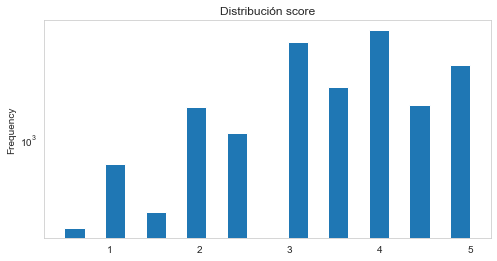

In [22]:
plt.figure(figsize = (8,4))
plataformas_df['score'].plot.hist(log=True, bins = 20)
plt.title('Distribución score')
plt.grid()
plt.show()

VERIFICAMOS OUTLIERS, dispersion y valores atipicos

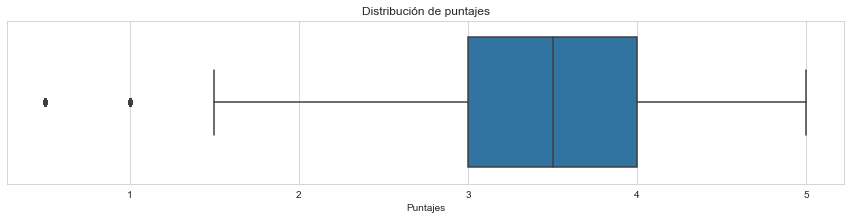

In [26]:
#Gráfico comportamiento outliers variable score

sns.set_style("whitegrid")
plt.subplots(figsize=(15,3))
sns.boxplot(x=plataformas_df[~plataformas_df['score'].isna()]['score'], linewidth=1.5)
plt.title("Distribución de puntajes")
plt.xlabel("Puntajes")
plt.show()

Verificamos correlacion de variables, para revisar redundancias entre variables explicativas

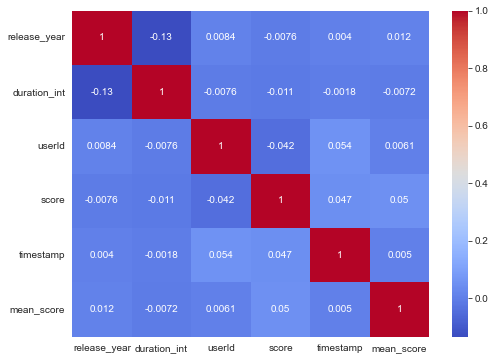

In [24]:
corr = plataformas_df.corr ()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Graficamos pairplot matriz de diagramas de dispersión para cada par de columnas en un DataFrame, para visualizar la relación entre diferentes variables

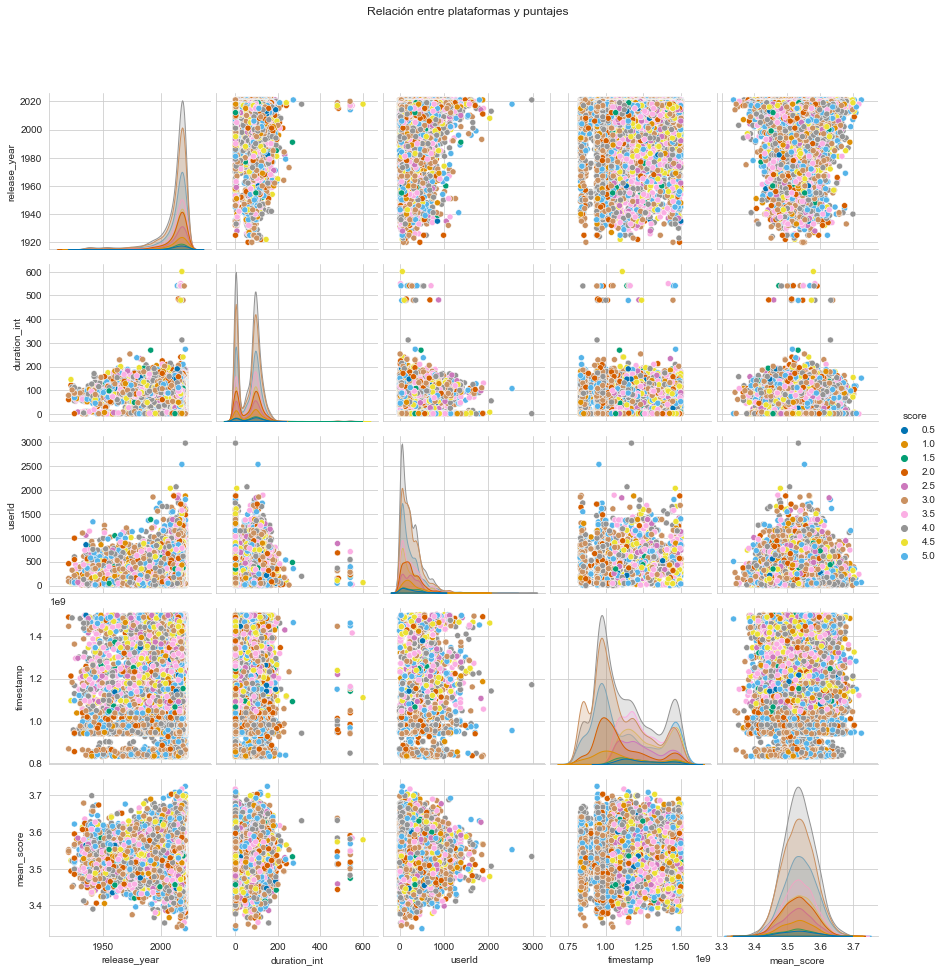

In [25]:
sns.set_style("whitegrid")
g = sns.pairplot(plataformas_df, hue="score", palette="colorblind")
g.fig.suptitle("Relación entre plataformas y puntajes", y=1.08)
plt.xlabel("Plataformas")
plt.ylabel("Puntajes")
plt.show()

Top 10 del contenido mas popular, por titulo, genero tomando en cuenta el campo score 

In [27]:
# Agrupamos los datos por título, categoría y puntuación, y calculamos la media de las puntuaciones
populares = plataformas_df.groupby(['title', 'listed_in'])['score'].mean().reset_index()

# Ordenamos los datos por puntuación de mayor a menor
populares = populares.sort_values('score', ascending=False)

# Creamos un DataFrame con los 10 contenidos más populares
df_populares = pd.DataFrame(populares.head(10))

# Establecemos el estilo para el DataFrame y alineamos el texto a la izquierda
df_populares.style.set_properties(**{'text-align': 'left'})


,title,listed_in,score
5758,drake & josh,"comedy, family, kids",5.000000
12056,mike birbiglia: thank god for jokes,stand-up comedy,5.000000
18319,the clovehitch killer,"drama, horror, mystery",5.000000
5560,dogs of berlin,"crime tv shows, international tv shows, tv dramas",5.000000
18330,the color of friendship,"biographical, drama",5.000000
18335,the command,"dramas, international movies, thrillers",5.000000
18339,the complex: lockdown,science fiction,5.000000
18340,the computer wore tennis shoes,"comedy, crime, science fiction",5.000000
5538,doctor blood's coffin,"horror, science fiction",5.000000
5536,docobanksy,documentary,5.000000
